In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv


In [18]:
#let us start by reading the data using pandas
data = pd.read_csv ("../input/train.csv")

In [19]:
#lets look at how our data looks like for the first few rows
data.head()

,Territory X Date,target,cases,Territory,Date,Continent
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia


In [20]:
#lets get the information we want to know about the whole data
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10659 entries, 0 to 10658
Data columns (total 6 columns):
Territory X Date    10659 non-null object
target              10659 non-null int64
cases               10659 non-null int64
Territory           10659 non-null object
Date                10659 non-null object
Continent           10659 non-null object
dtypes: int64(2), object(4)
memory usage: 499.8+ KB


None

In [21]:
'''looking at the above data we can see that the date column comes out as an object(string) lets change that for sth 
that is going to be easily used during EDA
'''
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')

In [22]:
#lets see if the data.dtype for the date column has changed
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10659 entries, 0 to 10658
Data columns (total 6 columns):
Territory X Date    10659 non-null object
target              10659 non-null int64
cases               10659 non-null int64
Territory           10659 non-null object
Date                10659 non-null datetime64[ns]
Continent           10659 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 499.8+ KB


None

In [23]:
#lets look at the unique names for the columns and from there also the unique values so as to drop unwanted data
list(data.columns)

['Territory X Date', 'target', 'cases', 'Territory', 'Date', 'Continent']

In [24]:
#dropping the repeated columns which are the last two
#repeated_columns_for_dropping = data[['Territory','Date']]
#data = data.drop(repeated_columns_for_dropping,axis = 1)

In [25]:
#lets look at the train data description to better understand the data
data.describe()

,target,cases
count,10659.000000,10659.000000
mean,8.624261,277.716015
std,140.033483,4177.200903
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3172.000000,80932.000000


In [26]:
print("Number of Territories: ", data['Territory'].nunique())
print("Dates go from day", max(data['Date']), "to day", min(data['Date']), ", a total of", data['Date'].nunique(), "days")
#our data has no states
#print("Countries with Province/State informed: ", data[data['Province/State'].isna()==False]['Country/Region'].unique())

Number of Territories:  209
Dates go from day 2020-03-12 00:00:00 to day 2020-01-22 00:00:00 , a total of 51 days


In [27]:
#let us look at these territories just to make sure that each stands on its own
print(data['Territory'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas (the)' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic (the)' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros (the)' 'Congo (the)' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea (the)"
 'Democratic Republic of the Congo (the)' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic (the)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia (the)' 'Georgia' 'Germany' 'Ghana'
 

In [28]:
#from the above data we can see that each country appears only once 
#lets see the number of entries per Territory
data['Territory'].value_counts()

Australia                     51
Saint Lucia                   51
United Arab Emirates (the)    51
Tuvalu                        51
Namibia                       51
                              ..
Turkmenistan                  51
Benin                         51
Antigua and Barbuda           51
Timor-Leste                   51
Mauritania                    51
Name: Territory, Length: 209, dtype: int64

In [29]:
'''# produces Pandas Series
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()
'''

"# produces Pandas Series\ndata.groupby('month')['duration'].sum() \n# Produces Pandas DataFrame\ndata.groupby('month')[['duration']].sum()\n"

Text(0.5, 0, 'Date')

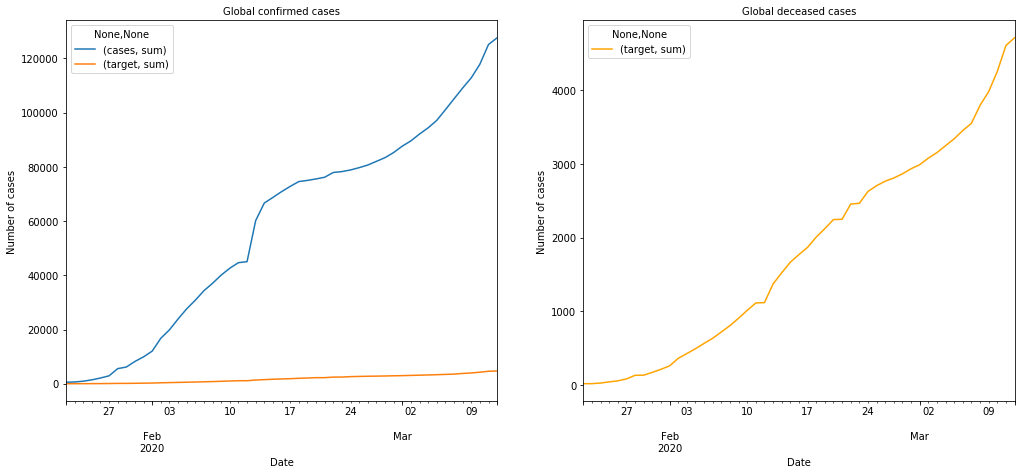

In [30]:
#lets check the number of deaths and infected confirmed cases by using plots
#importing the necessary dependency
import matplotlib.pyplot as plt

confirmed_total_date = data.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

we know that the virus originated from china so we can use this to compare with the China graph for both the confirmed cases against the deaths and check if the graphs flow the same remembering that during some time china changed how it considered whether somebody was considered positive (11/03/2020).This may be registered as a spike and considering other policies that are put in place that may likely affect the number of cases of the infected people.


Text(0.5, 0, 'Date')

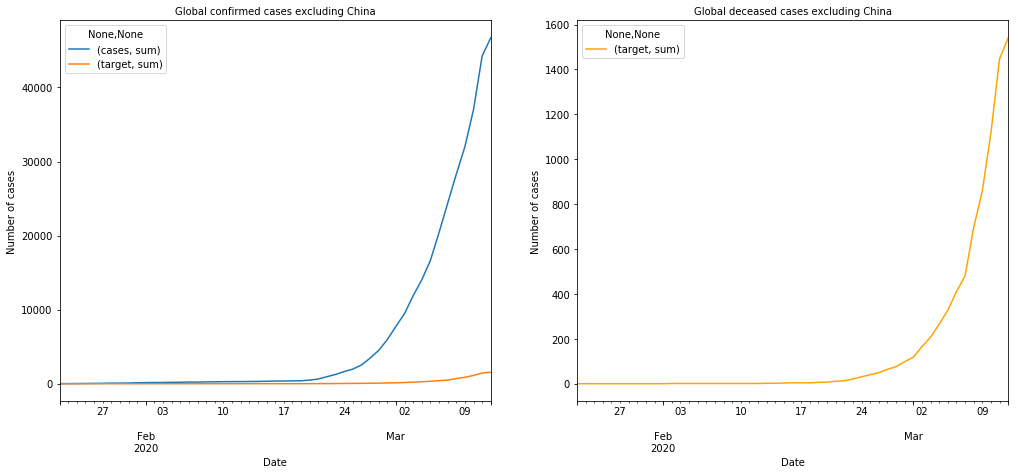

In [31]:
#lets draw the curve excluding china
confirmed_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Without China we should be getting a smoother curve as which more or less looks like the SIR model for epidemiology where there is a steep rise then a gentle drop in the number of cases but remember that unlike other countries that can learn from China,China had no prior warning of the contagion.

Text(0.5, 0, 'Date')

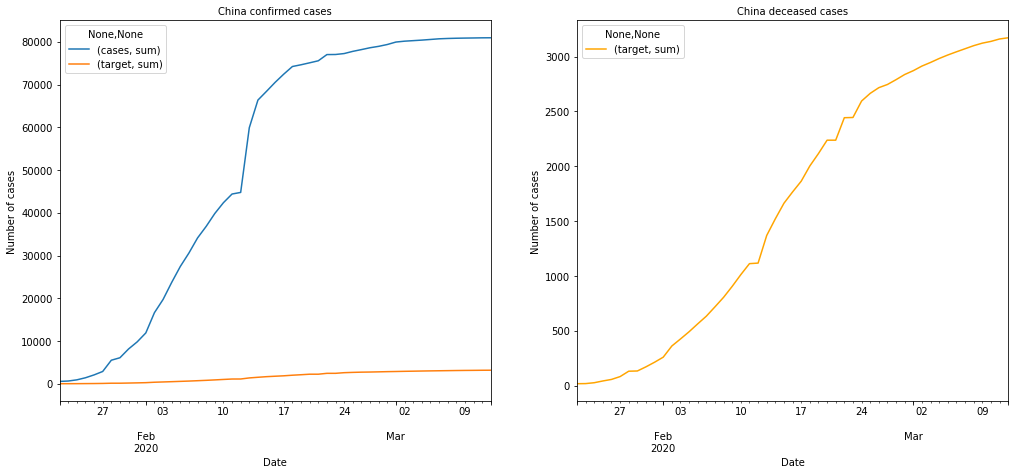

In [32]:
confirmed_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Text(0.5, 0, 'Date')

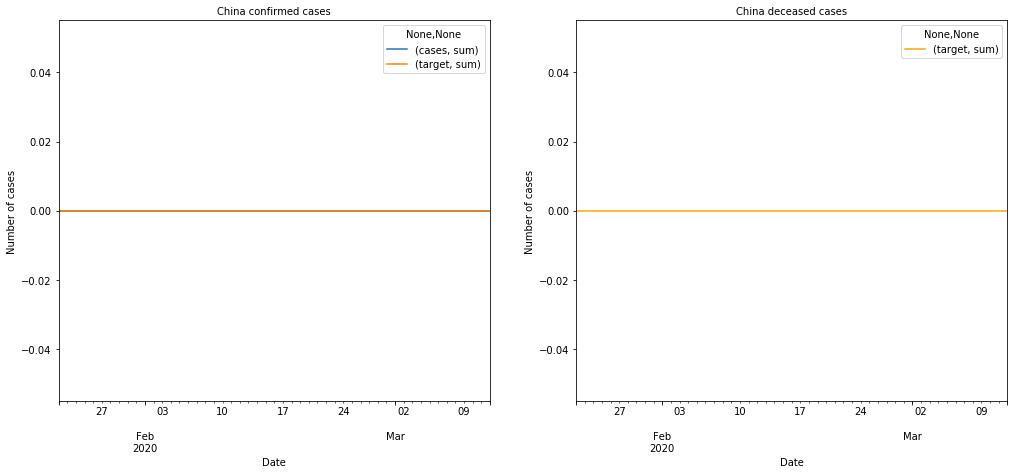

In [33]:
confirmed_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

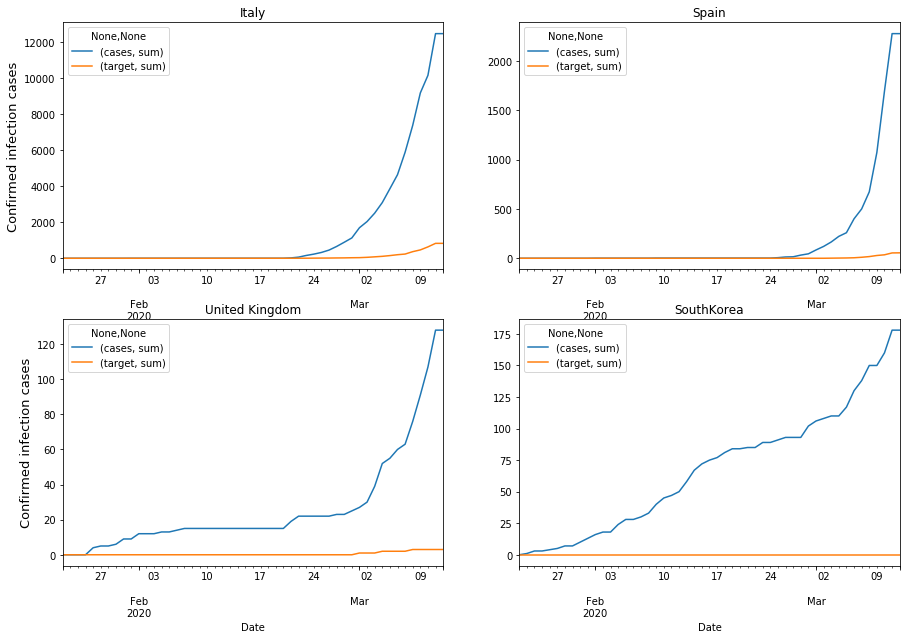

In [34]:
#looking at the worst hit countries as of now
#Italy
confirmed_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

In [35]:
#what type of data can we deduce from the given data
#we can get the mortality rate in the countries as of the beginning of the beginning and we will compare with other weeks
data.head()

,Territory X Date,target,cases,Territory,Date,Continent
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,Asia
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,Asia
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,Asia
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,Asia
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,Asia


In [36]:
#calculating the difference between cases and target that will help in getting mortality rate
data['diff']=data['cases'] - data['target']

In [37]:
#checking whether the difference column has been created
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,Asia,0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,Asia,0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,Asia,0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,Asia,0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,Asia,0


In [38]:
#calculating the mortality rates of different Territories rounded off to two decimal places
data['mortality rate'] = round((data['diff']/data['cases']) * 100,2)

In [39]:
#looking at the data type for the various columns that we have
print(data.dtypes)

Territory X Date            object
target                       int64
cases                        int64
Territory                   object
Date                datetime64[ns]
Continent                   object
diff                         int64
mortality rate             float64
dtype: object


In [40]:
print("Number of mortality rates: ", data['mortality rate'].nunique())
#print("Number of mortality rates: ", data['mortality rate'].unique())
print("Number of unique differences: ", data['diff'].nunique())
#print("Number of mortality rates: ", data['diff'].unique())

Number of mortality rates:  220
Number of unique differences:  310


In [41]:
#lets look to see if the mortality rate has been calculated for each country
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff,mortality rate
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,Asia,0,NaN
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,Asia,0,NaN
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,Asia,0,NaN
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,Asia,0,NaN
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,Asia,0,NaN


In [42]:
data['mortality rate'] = data['mortality rate'].replace(np.nan, 0.00, regex=True)

In [43]:
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff,mortality rate
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,Asia,0,0.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,Asia,0,0.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,Asia,0,0.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,Asia,0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,Asia,0,0.0


In [44]:
#making sure that we have not changed the various data types with the code above
print(data.dtypes)

Territory X Date            object
target                       int64
cases                        int64
Territory                   object
Date                datetime64[ns]
Continent                   object
diff                         int64
mortality rate             float64
dtype: object


In [45]:
#pip install pycountry-convert
#using pycountry-convert in kaggle turned out to be a deliberate scam and it did not work out in my favor
#used the alternative which is to tweak the dataset in excel manually and added the column for the continent

In [46]:
'''#lets group the respective Territories to their Continents this may help in organizing per R0
import pycountry_convert as pc

country_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)'''

'#lets group the respective Territories to their Continents this may help in organizing per R0\nimport pycountry_convert as pc\n\ncountry_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")\nprint(country_code)\ncontinent_name = pc.country_alpha2_to_continent_code(country_code)\nprint(continent_name)'

In [47]:
'''the next part is to check the modal split of the individual continents but there was lack of data for the various
continents especially Africa so lets look at sth that we have data on which is which countries have put up stringent
measures and with those we can use the R0 as a little less than others where people still move freely
'''

'the next part is to check the modal split of the individual continents but there was lack of data for the various\ncontinents especially Africa so lets look at sth that we have data on which is which countries have put up stringent\nmeasures and with those we can use the R0 as a little less than others where people still move freely\n'

In [48]:
#checking whether continent column has any null values
data['Continent'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10654    False
10655    False
10656    False
10657    False
10658    False
Name: Continent, Length: 10659, dtype: bool

In [49]:
#checking for the data types of all columns
print(data.dtypes)

Territory X Date            object
target                       int64
cases                        int64
Territory                   object
Date                datetime64[ns]
Continent                   object
diff                         int64
mortality rate             float64
dtype: object


In [50]:
'''
for places with high laws on covid we use 3,medium we use 2 and low we use 1 and very low 0
adapted from https://www.weforum.org/agenda/2020/03/coronavirus-this-is-how-the-world-is-responding/ and
https://www.vox.com/science-and-health/2020/3/22/21189889/coronavirus-covid-19-pandemic-response-south-korea-phillipines-italy-nicaragua-senegal-hong-kong
https://www.nation.co.ke/news/How-countries-are-battling-coronavirus/1056-5502012-147wgeoz/index.html
http://www.xinhuanet.com/english/2020-03/16/c_138883650.htm
'''
def label_race (row):
    if row['Territory'] == 'Republic of Korea (the)' :
        return 3
    if row['Territory'] == 'United States of America (the)' :
        return 2
    if row['Territory'] == 'Philippines (the)':
        return 1
    if row['Territory']  == 'Nicaragua':
        return 0
    if row['Territory'] == 'Italy':
        return 1
    if row['Territory'] == 'Senegal':
        return 3
    if row['Territory'] == 'Singapore':
        return 3
    if row['Territory'] == 'Tunisia':
        return 2
    if row['Territory'] == 'Kenya':
        return 2
    if row['Territory'] == 'France':
        return 2
    if row['Territory'] == 'Iran (Islamic Republic of)':
        return 1
    if row['Territory'] == 'Germany':
        return 2
    if row['Territory'] == 'Switzerland':
        return 2
    if row['Territory'] == 'Austria':
        return 1
    if row['Territory'] == 'China':
        return 3
    if row['Territory'] == 'Japan':
        return 2
    if row['Territory'] == 'Saudi Arabia':
        return 3
    if row['Territory'] == 'Egypt':
        return 3
    if row['Territory'] == 'United Kingdom of Great Britain and Northern Ireland (the)':
        return 2
    if row['Territory'] == 'South Africa':
        return 2
    if row['Territory'] == 'Uganda':
        return 1
    if row['Territory'] == 'Argentina':
        return 2
    if row['Territory'] == 'Serbia':
        return 3
    if row['Territory'] == 'Czechia':
        return 2
    if row['Territory'] == 'Mexico':
        return 1
    if row['Territory'] == 'Iraq':
        return 2
    if row['Territory'] == 'Astralia':
        return 2
    return 0
#data.apply (lambda row: label_race(row), axis=1)
data['Stringent'] = data.apply (lambda row: label_race(row), axis=1)

In [51]:
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff,mortality rate,Stringent
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,Asia,0,0.0,0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,Asia,0,0.0,0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,Asia,0,0.0,0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,Asia,0,0.0,0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,Asia,0,0.0,0


In [52]:
#checking to see if the values for the Stringent stuck
print("Number of unique values for the Stringent column: ", data['Stringent'].nunique())

Number of unique values for the Stringent column:  4


In [53]:
#checking for the data types of all columns
print(data.dtypes)

Territory X Date            object
target                       int64
cases                        int64
Territory                   object
Date                datetime64[ns]
Continent                   object
diff                         int64
mortality rate             float64
Stringent                    int64
dtype: object


In [58]:
'''pre processing and this will be used to make sure that you convert all the object columns into sth that can be 
used to train the model and in this we are going to be using xgboost
for the conversion from categorical to interger we are going to use a function in case we need to re use
function at a later time
'''
from sklearn.preprocessing import OrdinalEncoder
def categoricalToInteger(data):
    #Define Ordinal Encoder Model
    oe = OrdinalEncoder()
    data[['Territory X Date','Territory','Continent']] = oe.fit_transform(data.loc[:,['Territory X Date','Territory','Continent']])
    return data
#apply the function
data = categoricalToInteger(data)

In [59]:
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff,mortality rate,Stringent
0,0.0,0,0,0.0,2020-01-22,1.0,0,0.0,0
1,1.0,0,0,0.0,2020-01-23,1.0,0,0.0,0
2,2.0,0,0,0.0,2020-01-24,1.0,0,0.0,0
3,3.0,0,0,0.0,2020-01-25,1.0,0,0.0,0
4,4.0,0,0,0.0,2020-01-26,1.0,0,0.0,0


In [60]:
'''we know that the more data we have the better our model will actually become so we can use this to our 
advantage and split the date column to have more data from it
'''
def create_features(data):
    data['day'] = data['Date'].dt.day
    data['month'] = data['Date'].dt.month
    data['dayofweek'] = data['Date'].dt.dayofweek
    data['dayofyear'] = data['Date'].dt.dayofyear
    data['quarter'] = data['Date'].dt.quarter
    data['weekofyear'] = data['Date'].dt.weekofyear
    return data
#apply the function
data = create_features(data)

In [61]:
data.head()

,Territory X Date,target,cases,Territory,Date,Continent,diff,mortality rate,Stringent,day,month,dayofweek,dayofyear,quarter,weekofyear
0,0.0,0,0,0.0,2020-01-22,1.0,0,0.0,0,22,1,2,22,1,4
1,1.0,0,0,0.0,2020-01-23,1.0,0,0.0,0,23,1,3,23,1,4
2,2.0,0,0,0.0,2020-01-24,1.0,0,0.0,0,24,1,4,24,1,4
3,3.0,0,0,0.0,2020-01-25,1.0,0,0.0,0,25,1,5,25,1,4
4,4.0,0,0,0.0,2020-01-26,1.0,0,0.0,0,26,1,6,26,1,4


In [63]:
# lets drop the diff column since it was only used to calculate the mortality rate 
data=data.drop(['diff'], axis=1)

In [ ]:
data.head()